# Statistics for Data Science with Python - Capstone Project

## Project Case Scenario

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?
* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

## Task 1: Become familiar with the dataset

The following describes the dataset variables:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's


## Task 2: Optional-IBM Cloud

## Task 3: Load the Dataset

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.shape

(506, 14)

In [4]:
boston_df.to_csv('boston_housing_df.csv', index=False)

## Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels.

Generate the following and explain your findings:
* For the "Median value of owner-occupied homes" provide a __boxplot__
* Provide a __bar plot__ for the Charles river variable
* Provide a __boxplot__ for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
* Provide a __scatter plot__ to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
* Create a __histogram__ for the pupil to teacher ratio variable


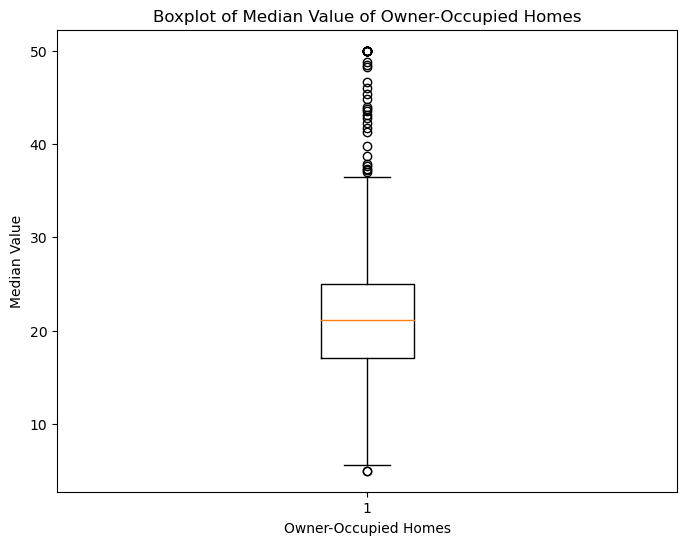

In [15]:
# boxplot For the "Median value of owner-occupied homes"
# Extract the "Median value of owner-occupied homes" column
median_values = boston_df['MEDV']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(median_values, vert=True)  # vert=False for horizontal boxplot
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.xlabel('Owner-Occupied Homes')
plt.ylabel("Median Value")
plt.show()


In [18]:
median_values.median()

21.2

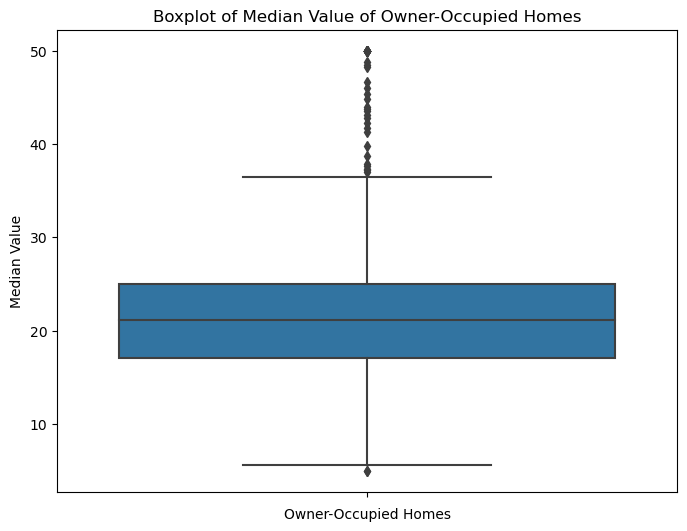

In [22]:
# Create a boxplot using sns.boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])  # x=boston_df['MEDV'] for horizontal boxplot
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.xlabel('Owner-Occupied Homes')
plt.ylabel("Median Value")
plt.show()

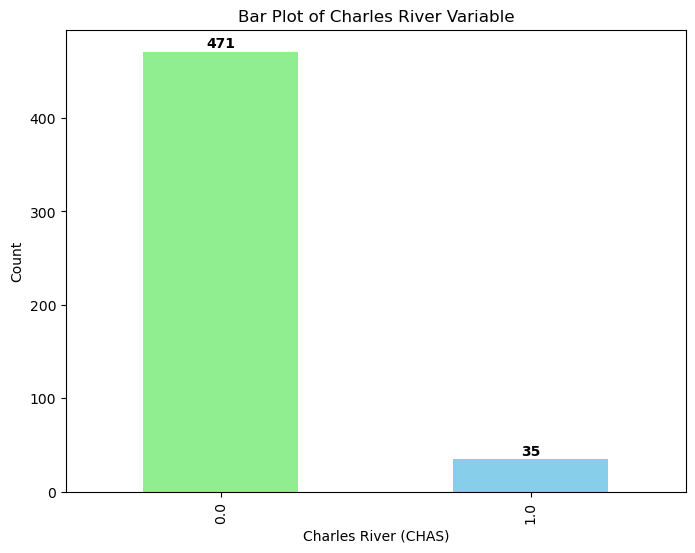

In [16]:
# bar plot for the Charles river variable (1 if tract bounds river; 0 otherwise)
# Extract the "Charles river variable" column
charles_values = boston_df['CHAS']

# Create a bar plot
plt.figure(figsize=(8, 6))
charles = charles_values.value_counts()
charles.plot(kind='bar', color=['lightgreen', 'skyblue'])
plt.title("Bar Plot of Charles River Variable")
plt.xlabel("Charles River (CHAS)")
plt.ylabel("Count")

# Display counts on the plot
for i, count in enumerate(charles_values.value_counts()):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')

plt.show()


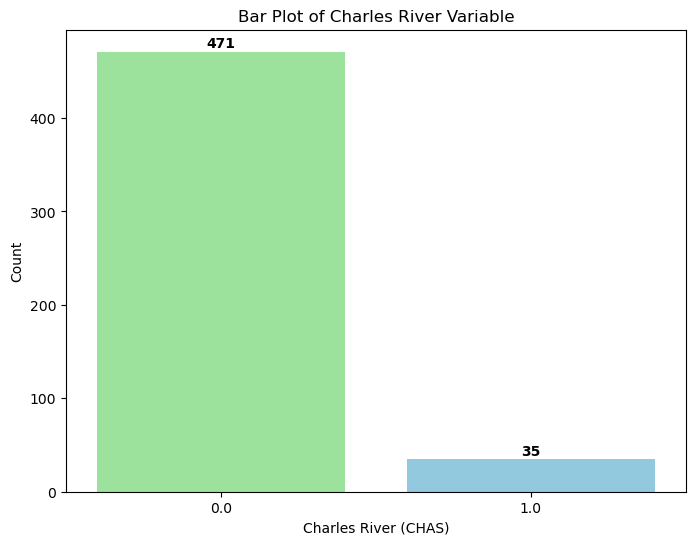

In [52]:
# bar plot for the Charles river variable (1 if tract bounds river; 0 otherwise)
# Extract the "Charles River variable" column
charles_values = boston_df['CHAS']

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=charles_values.value_counts().index, y=charles_values.value_counts(), palette=['lightgreen', 'skyblue'])
plt.title("Bar Plot of Charles River Variable")
plt.xlabel("Charles River (CHAS)")
plt.ylabel("Count")

# Display counts on the plot
for i, count in enumerate(charles_values.value_counts()):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')

plt.show()

In [34]:
# boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [35]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


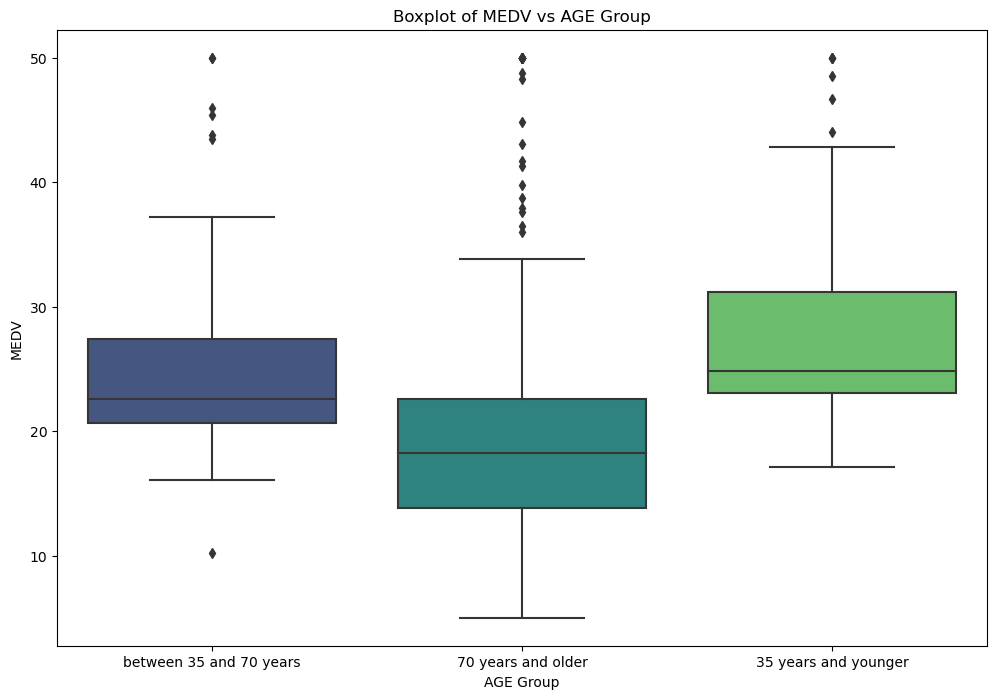

In [61]:
# boxplot for the MEDV variable vs the AGE variable. 
# Create a boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='MEDV', data=boston_df, palette='viridis')
plt.title("Boxplot of MEDV vs AGE Group")
plt.xlabel("AGE Group")
plt.ylabel("MEDV")
plt.show()

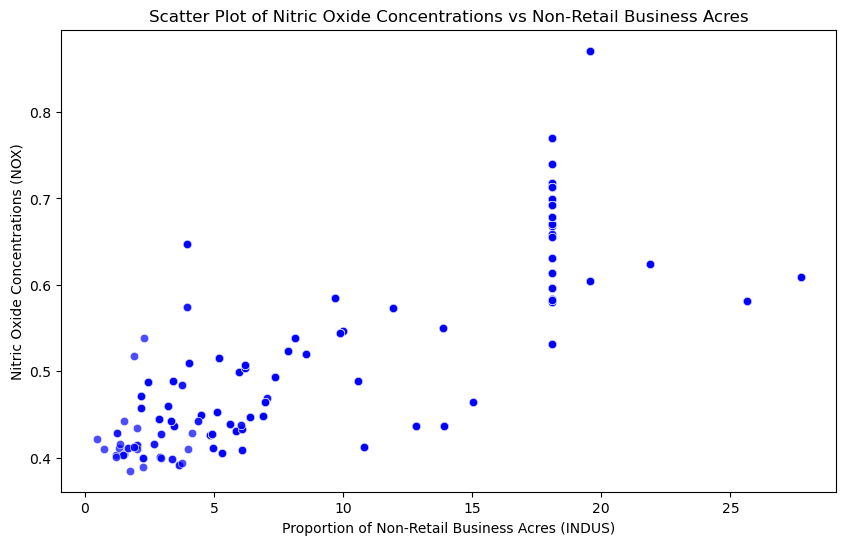

In [62]:
# scatter plot to show the relationship between Nitric oxide concentrations and the 
# proportion of non-retail business acres per town. What can you say about the relationship?
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.7, color='blue')
plt.title("Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres")
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentrations (NOX)")
plt.show()

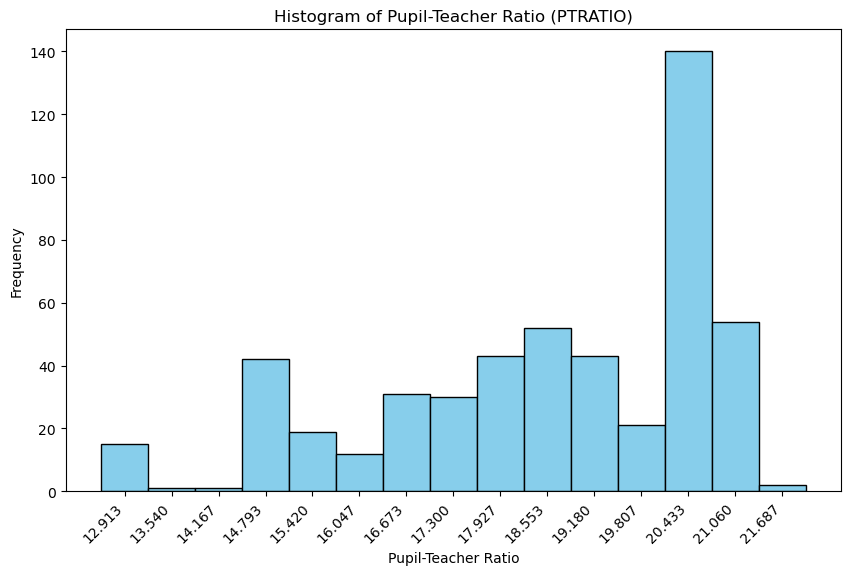

In [8]:
# Create a histogram for the pupil to teacher ratio variable
# Create a histogram using Matplotlib
plt.figure(figsize=(10, 6))
hist_values, bin_edges, _ = plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")

# Calculate midpoints of the bins
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Set xticks at the midpoints of the bins
plt.xticks(bin_midpoints, rotation=45, ha='right')

plt.show()

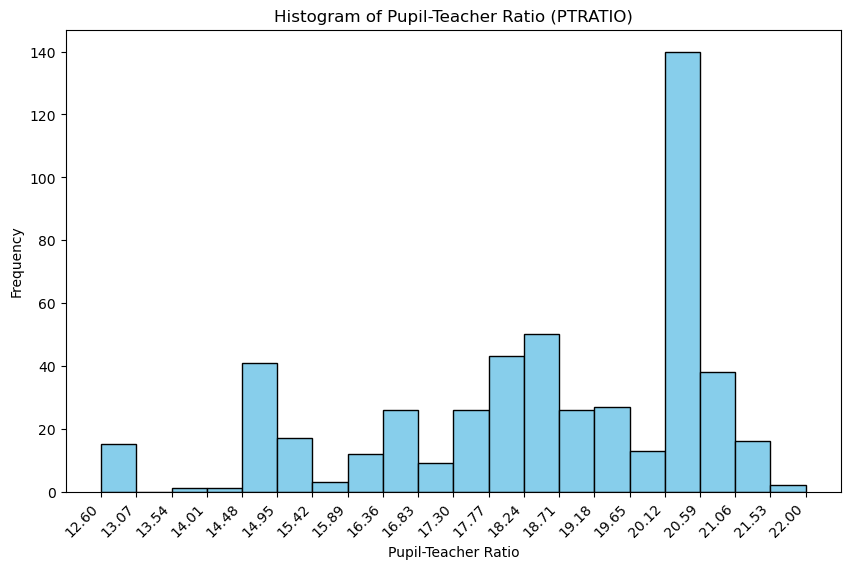

In [73]:
# Create a histogram using Matplotlib with xticks at the boundaries of the bins
plt.figure(figsize=(10, 6))
hist_values, bin_edges, _ = plt.hist(boston_df['PTRATIO'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")

# Set xticks at the boundaries of the bins
plt.xticks(bin_edges, rotation=45, ha='right')

plt.show()

## Task 5: Use the appropriate tests to answer the questions provided
For each of the following questions;
* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.


### Task 5.1

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:
* $H_0: \mu_1=\mu_2$ (there is no difference in the mean values)
* $H_1: \mu_1\not=\mu_2$ (the mean values are different)

<Figure size 1000x600 with 0 Axes>

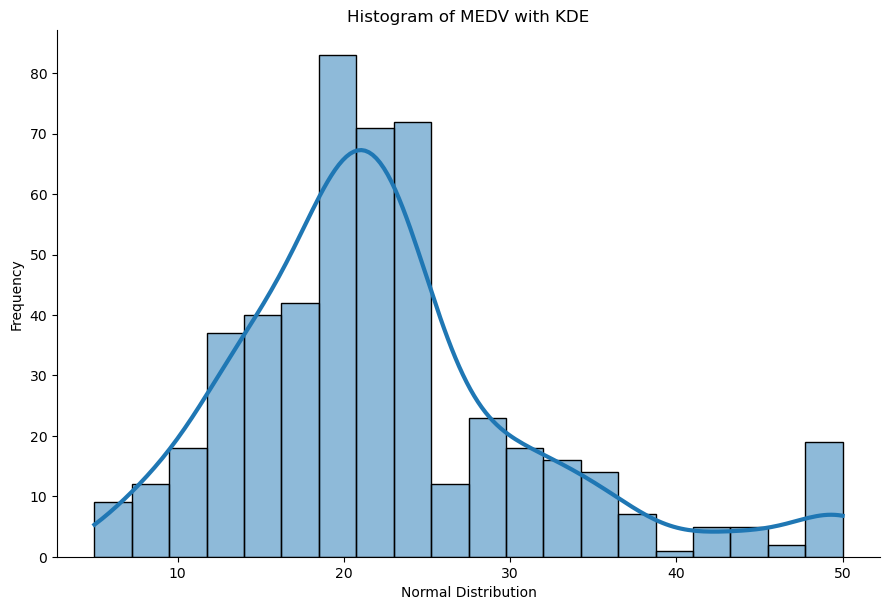

In [14]:
# Create a histogram using displot
plt.figure(figsize=(10, 6))
sns.displot(boston_df['MEDV'],
            bins=20,
            kde=True,
            #color='blue',
            line_kws={"linewidth": 3},  # Set the linewidth for the KDE line
            height=6,
            aspect=1.5)
plt.title("Histogram of MEDV with KDE")
plt.xlabel("Normal Distribution")
plt.ylabel("Frequency")
plt.show()
## we can assume it is normal

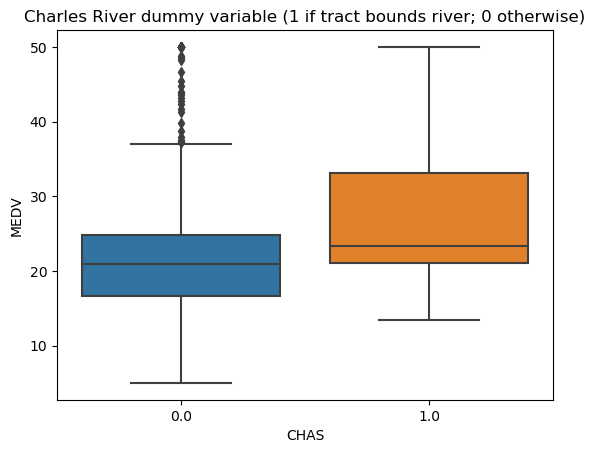

In [33]:
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
plt.title('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
plt.show()

In [18]:
charles_values.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [22]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

## Conclusion

Since the p-value is less than $\alpha=0.05$, we reject the null hypothesis. There is a significant difference in the mean values.

In [26]:
boston_df[boston_df['CHAS'] == 0]['MEDV'].mean()

22.093842887473464

In [28]:
boston_df[boston_df['CHAS'] == 1]['MEDV'].mean()

28.439999999999998

In [30]:
boston_df[boston_df['CHAS'] == 0].mean()

Unnamed: 0    252.649682
CRIM            3.744447
ZN             11.634820
INDUS          11.019193
CHAS            0.000000
NOX             0.551817
RM              6.267174
AGE            67.911677
DIS             3.851915
RAD             9.566879
TAX           409.870488
PTRATIO        18.527176
LSTAT          12.757941
MEDV           22.093843
dtype: float64

In [31]:
boston_df[boston_df['CHAS'] == 1].mean()

Unnamed: 0    250.485714
CRIM            1.851670
ZN              7.714286
INDUS          12.719143
CHAS            1.000000
NOX             0.593426
RM              6.519600
AGE            77.500000
DIS             3.029709
RAD             9.314286
TAX           386.257143
PTRATIO        17.491429
LSTAT          11.241714
MEDV           28.440000
dtype: float64

### Task 5.2

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

* $H_0$: There is no difference in the mean values of Median values of houses (MEDV) for different age groups
* $H_1$: The mean values are different

In [40]:
less_35 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
bw_35_70 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
greater_70 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

Now, run a one-way ANOVA.

In [41]:
f_statistic, p_value = scipy.stats.f_oneway(less_35, bw_35_70, greater_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


## Conclusion

Since the p-value is less than $\alpha=0.05$, we reject the null hypothesis. At least one of the mean value is different from the others.

### Task 5.3

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

* $H_0$: There is no significant linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
* $H_1$: There is a significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.

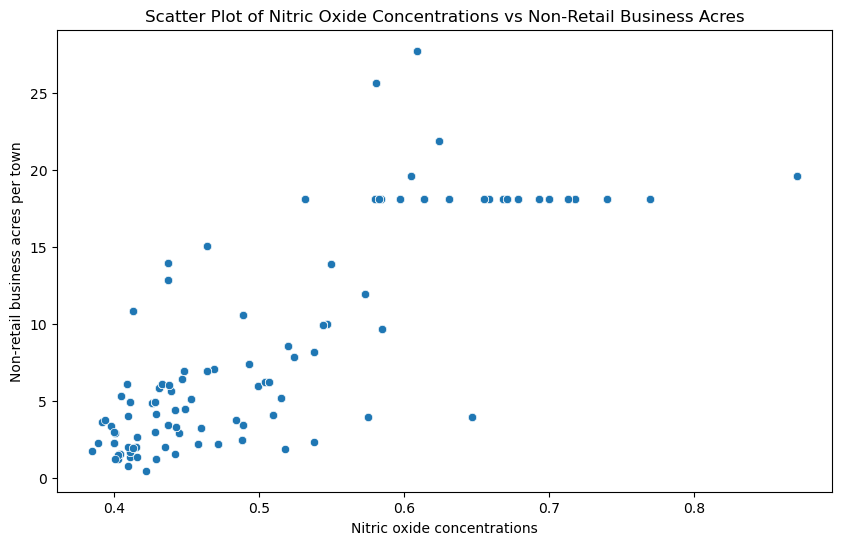

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax.set_title("Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres")
ax.set_xlabel('Nitric oxide concentrations')
ax.set_ylabel('Non-retail business acres per town')
plt.show()

In [52]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

In [55]:
# Calculate Pearson correlation coefficient
pearson_corr = boston_df['NOX'].corr(boston_df['INDUS'])

print("Pearson Correlation Coefficient:", pearson_corr)

Pearson Correlation Coefficient: 0.763651446920914


## Conclusion

Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.

### Task 5.4

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis:

* Null Hypothesis (H₀):

    * $H_0: \beta_1=0$, There is no significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes. where $\beta_1$ is the coefficient associated with the additional weighted distance variable.

* Alternative Hypothesis (H₁):

    * $H_1: \beta_1\not=0$, There is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.

In [57]:
boston_df['DIS'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

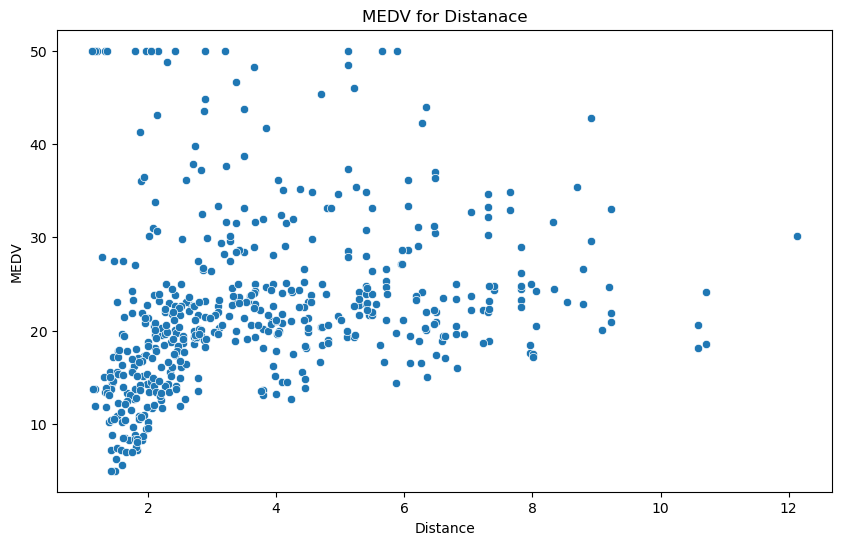

In [59]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x="DIS", y="MEDV", data=boston_df)
ax.set_title("MEDV for Distanace")
ax.set_xlabel('Distance')
ax.set_ylabel('MEDV')
plt.show()

In [69]:
# X is the input variables (or independent variables)
X = boston_df['DIS']
#X = boston_df[['AGE', 'DIS', 'CHAS']]  # Add other variables as needed
# y is the target/dependent variable
y = boston_df['MEDV']
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

# Fit the (multiple) linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        19:51:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [66]:
# Extract and print the p-values
p_values = model.pvalues
print("P-values:")
print(p_values)

P-values:
const    4.008955e-78
DIS      1.206612e-08
dtype: float64


## Conclusion

Since p-value is nearly zero, less than 0.05, we reject the null hypothesis. There is a significant impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.